# Segmenting cells with cellpose within a notebook

This very simple notebook segments cells using [cellpose](https://www.cellpose.org/). You can also do this from the command line. Notebook adapted from this [example](https://nbviewer.org/github/MouseLand/cellpose/blob/master/notebooks/run_cellpose.ipynb).


In [7]:
import glob
from tqdm import tqdm
from cellpose import models, io
from cellpose import plot
import matplotlib.pyplot as plt
%matplotlib inline  

Modify the code in this block to find you data:

In [8]:
data_dir = 'Y:/SteveT/jeremy_test/'
files = glob.glob(data_dir + '/*.tif')
print(str(len(files)) + ' files found')

7 files found


Configure cellpose here:

In [9]:
gpu = True
model_type = 'cyto2'

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus
channels = [0,0]
diameter = None
save_pngs = False

Segment cells using cellpose:

Segmenting cells with cellpose...


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:02<00:00,  8.98s/it]


Plotting example...


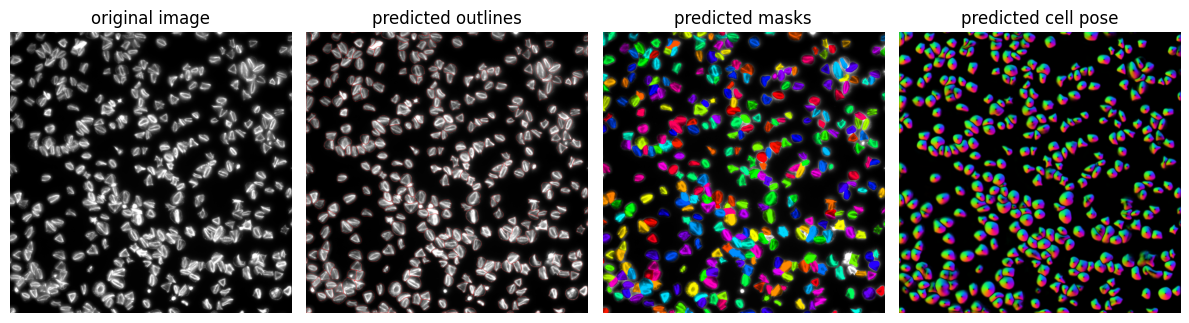

In [10]:
print("Segmenting cells with cellpose...")
model = models.Cellpose(gpu=gpu, model_type=model_type)
for idx in tqdm(range(len(files))):
    filename = files[idx]
    img = io.imread(filename)
    masks, flows, styles, diams = model.eval(img, diameter=diameter, channels=channels)
    # save results so you can load in gui
    io.masks_flows_to_seg(img, masks, flows, diams, filename, channels)
    # save results as png
    if save_pngs:
        io.save_masks(img, masks, flows, filename)
    
print("Plotting example...")
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()